<a href="https://github.com/theonaunheim">
    <img style="border-radius: 100%; float: right;" src="static/strawberry_thief_square.png" width=10% alt="Theo Naunheim's Github">
</a>

<br style="clear: both">
<hr>
<br>

<h1 align='center'>Advanced Methods</h1>

<br>

<div style="display: table; width: 100%">
    <div style="display: table-row; width: 100%;">
        <div style="display: table-cell; width: 50%; vertical-align: middle;">
            <img src="static/red_panda.jpg" width="80%">
        </div>
        <div style="display: table-cell; width: 10%">
        </div>
        <div style="display: table-cell; width: 40%; vertical-align: top;">
            <blockquote>
                <p style="font-style: italic;">"I have yet to see any problem, however complicated, which when you looked at it in the right way, did not become more complicated."</p>
                <br>
                <p>-Poul Anderson</p>
            </blockquote>
        </div>
    </div>
</div>


<br>




<br>

<div align='left'>
    Image courtesy of <a href='https://commons.wikimedia.org/wiki/File:Red_Panda_-_Nashville_Zoo.jpg'>Pmeenen</a> under the <a href='https://creativecommons.org/licenses/by/2.5/deed.en'>CC BY 2.5</a>
</div>

<hr>

In [ ]:
# Import stuff so we can use libraries.
import numpy as np
import pandas as pd

# Use %matplotlib inline to plot in this screen.
import matplotlib
%matplotlib inline

## Advanced Methods

In addition to the methods we discussed previously, there is a set of special methods that warrant separate examination. They are:

* **[groupby](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.groupby.html)**: create a special object for analyzing groups collectively.
* **[map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html)**: allows you conveniently transform each value in the Series with a function or key-value mapping.
* **[plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html)**: this function creates different types of visualizations.
* **[rolling](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html)**: create a special object for performing window functions.
* **[str namespace methods](https://pandas.pydata.org/pandas-docs/stable/api.html#string-handling)**: a namespace/collection of vectorized Python string functions.
* **[dt namespace methods](https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties)**: a namespace/collection of methods for dealing with datetimes.

# Series.map()

The map method creates a new Series with each item in the Series transformed in a similar way. Map can use a variety of inputs, but most commonly uses either a 1) a function, 2) a dictionary or Series.

This is useful for when you need an arbitrary function instead of the default vectorized operations (unless you set it up that way) attached to the Series. Note: you generally won't get the speed of a true vectorized operation, but it does let you use Pandas syntax.

### Functions Passed to Map()

If you pass a function to map, it will:

1. Take the Series.
2. For each value in the Series, pass the value as an argument for a specific function you passed.


    new_value = function(old_value)

3. Stuff that new value (can be a different type) into a new Series.
4. Return the new Series, which is the same length as the old Series.

This makes more sense when you see it in action.

In [ ]:
# We define an arbitrary mapping function
def is_2(input_item):
    '''This function:
    
       Takes a single data value as an input.
       Returns True if input is 2.
       Returns False if input is greater than 2.
       Does not provide a return value otherwise (implicitly returns None).
       
    '''
    # Print newline.
    print(f'\nRunning is_2() for item {input_item}', end=' ... ')
    
    # Check if equal to 2.
    if input_item == 2:
        print(f'Input item {input_item} is equal to 2! Returning True.')
        return True
    
    # Check if greater than 2
    if input_item > 2:
        print(f'Input item {input_item} is greater than 2! Returning False.')
        return False
    
    print(f'Input item {input_item} not equal or greater than 2! Implicitly returning None.')
    
    # Fall off end.

In [ ]:
is_2(5)

In [ ]:
is_2(2)

In [ ]:
is_2(-5)

In [ ]:
# Create a series
s1 = pd.Series([1,2,3])

# Note, you want to pass a function object to our function without calling it ...
# Yes: series.map( function   )
# No!: series.map( function() )
# Which returns a transformed Series.
s2 = s1.map(is_2)

# Which is now a regular Series we can now use as a boolean indexer
print()
print(s1.loc[s2.fillna(False)])

# Showing transformed series
s2

In [ ]:
# Again, this can be whatever function that takes a single argument. E.g. get log of number.
s1.map(np.log)

### Dictionaries or Series passed to map()

This is much simpler. It's a lot like using a surrogate key in SQL. This will:

1. Take the Series.
2. For each value in Series:

    a. if using a mapping dict, if the value is a key, replace with the value.
    
    b. if using a mapping Series, if the value is an index value, replace with the data value.
    
    c. if the value is not found, replace with np.NaN (which may change your dtype)

Again, this makes more sense when you see it in action.

In [ ]:
# Data Series
s3 = pd.Series(['one', 'two', 'three', 'four', 'five'])

# Mapping Series
s4 = pd.Series(
    index=['one', 'two', 'four'],
    data=['uno', 'dos', 'cuatro']
)

# Equivalent mapping dict
map_dict = {'one': 'uno', 'two': 'dos', 'four': 'cuatro'}

# Original series 
print('\nShowing original:\n')
print(s3)

# Mapping dict
print('\nShowing mapping Series:\n')
print(s4)

# Showing output
print('\nShowing the new mapped Series:\n')
s5 = s3.map(s4)
s5 = s3.map(map_dict)
print(s5)

In [ ]:
# Note: you will also often see lambda functions used with map.
s6 = pd.Series([5, 3, 2], name='radii')

# Anonymous function / lambda for generating circumference
s6.map(lambda value: np.pi * value / 2 ** 2)

# Series.groupby()

The groupby method creates a special object for analyzing data in aggregate. In other words, it puts your data into groups and then allows you to analyze all these groups simply and efficiently.

This is done by: 
1. Creating your groupby object by giving your Series the group of each item in the series.
2. Using the methods and attributes of the groupby object to get the data for your groups. Your result will generally have the groups as the index and the group data as the values. 

Like we've said time and time again, this is easier to understand it when you see it. 

In [ ]:
# Say we have the following scores
data = pd.Series([93, 84, 93, 86, 76, 96])

In [ ]:
# For the following people
groups = pd.Series(['Davidson', 'Brown', 'Davidson', 'Brown', 'Williamson', 'Davidson'])

In [ ]:
# If we want to group the scores by the people, we pass that info to a groupby()
gb = data.groupby(groups)

In [ ]:
# Which gives us a groupby object we can analyze.
print(gb.mean())

In [ ]:
# Or get a specific group (but that generally defeats the purpose of grouping)
gb.get_group('Davidson')

In [ ]:
# Or we can apply arbitrary methods and get the results by group.
def is_even(input_series):
    output_series = input_series % 2 == 0
    return output_series.value_counts()

                                                                                       
gb.apply(is_even)

In [ ]:
# It's important not to think of these as a Series, but you can get Series back.
for name, ix in gb.groups.items():
    print(name, ' has index:\n', str(ix), '\n')

# Series.rolling()

The rolling method creates an object that is used for rolling windows (e.g. 30 day rolling average).

This is done by:

1. Creating your roling object by supplying a window based on your index or datetime index.
2. Using the methods and attributes of the rolling object.

In [158]:
# Create random data for a 30 day period.
dt_index = pd.DatetimeIndex(start='2018-01-01', end='2018-01-15', freq='d')
random_data = np.random.randint(0, 30, len(dt_index))

# Turn it into a series.
s7 = pd.Series(
    data=random_data,
    index=dt_index,
)

# Using rolling method to create object with a 7 day window period.
roll = s7.rolling('3d', min_periods=3)

# Get rolling average (e.g. the 3 day rolling average on 2018-01-03 is X)
rolling_3_day_average = roll.mean()
rolling_3_day_average

2018-01-01          NaN
2018-01-02          NaN
2018-01-03    12.333333
2018-01-04    18.333333
2018-01-05    12.000000
2018-01-06     7.000000
2018-01-07     6.000000
2018-01-08     7.333333
2018-01-09    14.333333
2018-01-10    18.333333
2018-01-11    18.666667
2018-01-12    16.333333
2018-01-13    12.333333
2018-01-14    17.000000
2018-01-15    14.333333
Freq: D, dtype: float64

# Series.plot()

For detail, see the official [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) tutorial

The plot function deserves a tutorial in itself, and is listed here only for the sake of completeness. See "Pandas Visualization" below for the official tutorial.

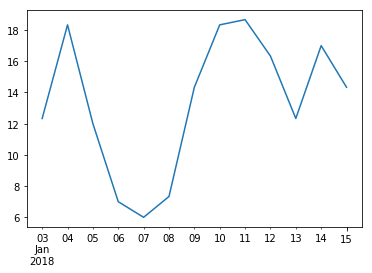

In [159]:
# Plot the rolling mean from the previous exercise as a line graph.
rolling_3_day_average.plot()

# Series.str (String Namespace)

For detail, see the official [Working with Text Data](http://pandas.pydata.org/pandas-docs/stable/text.html) tutorial.

In [ ]:
format conversion

# Series.dt (Datetime Namespace)

For detail, see the official [Time Series / Date Functionality](http://pandas.pydata.org/pandas-docs/stable/timeseries.html) tutorial.

# Additional Learing Resources

* ### [Pandas Split-Apply-Combine](https://pandas.pydata.org/pandas-docs/stable/groupby.html)
* ### [Pandas Computational Tools](http://pandas.pydata.org/pandas-docs/stable/computation.html)
* ### [Pandas Datetime Methods](https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties)
* ### [Pandas String Methods](https://pandas.pydata.org/pandas-docs/stable/api.html#string-handling)
* ### [Pandas Vizualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

---

# Next Up: [Preprocessing](3_preprocessing.ipynb)

<br>

<img style="margin-left: 0;" src="static/log_transform.svg" width="20%">

<br>

<div align='left'>
    Image courtesy of <a href='https://commons.wikimedia.org/wiki/File:Population_vs_area.svg'>Skbkekas</a> under the <a href='https://creativecommons.org/licenses/by-sa/3.0/deed.en'>CC BY-SA 3.0</a>
</div>

---